In [1]:
#!pip install tensorflow
#!pip install python-docx

In [2]:
#━━━━━━━━━❮Bibliotecas❯━━━━━━━━━
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns
import datetime
#━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

from docx import Document
#━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━

In [3]:
#━━━━━━━━━❮initial data❯━━━━━━━━━
df =pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
#━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━


#━━━━❮dados a serem previstos❯━━━
df_val =df.iloc[:10]
#━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━

#df_val.head(5)

In [4]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#      treatment of data
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

df.drop('customerID', 1, inplace=True)

df.TotalCharges =pd.to_numeric(df.TotalCharges, errors='coerce')

#Verificando valor vazio
df[df.TotalCharges.isna()]

#tirando valores vazios (totalcharges)
df.dropna(subset=['TotalCharges'], inplace=True)

#df.head(5)

C:\Users\pytho\AppData\Local\Temp\ipykernel_17512\1952428054.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('customerID', 1, inplace=True)


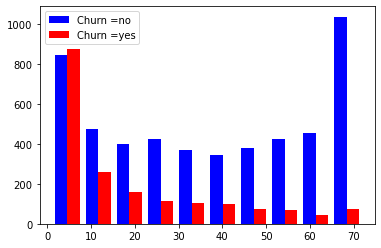

In [5]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#             Graficos
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━


#grafico analise de tenure
#    tenure--> quantidade de meses q o cliente ta na empresa

dfno =df[df.Churn=='No'].tenure
dfyes =df[df.Churn=='Yes'].tenure

plt.hist([dfno, dfyes], color=['blue','red'],label=['Churn =no', 'Churn =yes'])

plt.legend()

#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#        Salvando Relatório
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

plt.savefig("graph Churn-churn.png")

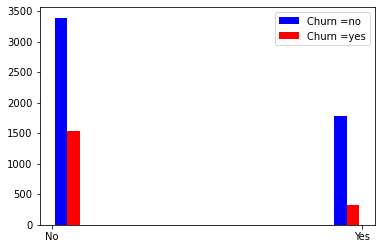

In [6]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#             Graficos
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

dfno =df[df.Churn=='No'].Dependents
dfyes =df[df.Churn=='Yes'].Dependents

plt.hist([dfno, dfyes], color=['blue','red'],label=['Churn =no', 'Churn =yes'])
plt.legend()

#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#        Salvando Relatório
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━



plt.savefig("graph churn-dep .png")

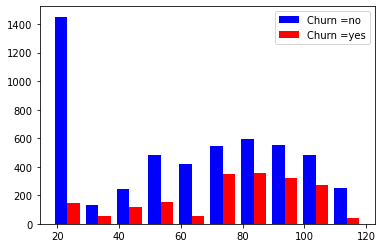

In [7]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#             Graficos
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

dfno =df[df.Churn=='No'].MonthlyCharges	
dfyes =df[df.Churn=='Yes'].MonthlyCharges	

plt.hist([dfno, dfyes], color=['blue','red'],label=['Churn =no', 'Churn =yes'])
plt.legend()


#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#        Salvando Relatório
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

plt.savefig("graph churn-MC.png")

No: 5163 Yes: 1869  % No: gender              100.0
SeniorCitizen       100.0
Partner             100.0
Dependents          100.0
tenure              100.0
PhoneService        100.0
MultipleLines       100.0
InternetService     100.0
OnlineSecurity      100.0
OnlineBackup        100.0
DeviceProtection    100.0
TechSupport         100.0
StreamingTV         100.0
StreamingMovies     100.0
Contract            100.0
PaperlessBilling    100.0
PaymentMethod       100.0
MonthlyCharges      100.0
TotalCharges        100.0
Churn               100.0
dtype: float64


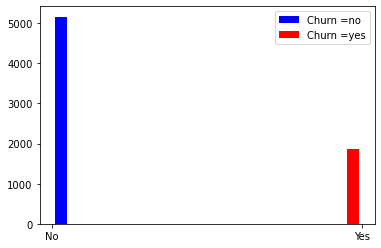

In [8]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#    balanceamento do dataset
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

dfno =df[df.Churn=='No'].Churn	
dfyes =df[df.Churn=='Yes'].Churn

total =dfno.count() +dfyes.count()
percent =round((df.count() /total)*100, 2)

print(f'No: {dfno.count()}',f'Yes: {dfyes.count()}', f' % No: {percent}')

#Plotagem

plt.hist([dfno, dfyes], color=['blue','red'],label=['Churn =no', 'Churn =yes'])
plt.legend()

In [9]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#    padronizando multiplanelines
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

for i in df:
  if df[i].dtypes =='object':
    print(f'{i} : {df[i].unique()}')
    
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [10]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#       Mudando para Números
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

dfnum =pd.get_dummies(data=df, columns=['gender', 'InternetService', 'Partner', 'Dependents', 'PhoneService',
                      'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                      'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                      'PaperlessBilling','PaymentMethod'])
dfnum.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_

In [11]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#           label encoder
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

le =LabelEncoder()
dfnum['Churn'] =le.fit_transform(dfnum['Churn'])
dfnum.Churn.sample(15)

4315    1
2515    0
3357    1
3174    0
875     0
1631    1
1011    0
5654    0
6592    0
6991    1
5854    0
1238    1
1701    1
1016    0
91      0
Name: Churn, dtype: int32

In [12]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#         Ajuste de Escala
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

scaler =MinMaxScaler()
dfnum[['tenure', 'MonthlyCharges', 'TotalCharges']] =scaler.fit_transform(dfnum[['tenure', 'MonthlyCharges','TotalCharges']])
#dfnum.sample(5)

In [13]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#     separar features e labels
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

features =dfnum.drop(['Churn'], 1)
label =dfnum['Churn']

C:\Users\pytho\AppData\Local\Temp\ipykernel_17512\3143173423.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  features =dfnum.drop(['Churn'], 1)


In [14]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#             Validação
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

val =features.head(10)
val.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Partner_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.000000,0.115423,0.001275,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0,0.464789,0.385075,0.215867,0,1,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,0.014085,0.354229,0.010310,0,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,0.619718,0.239303,0.210241,0,1,1,0,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,0.014085,0.521891,0.015330,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [15]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#           Novo Feature
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

features =features.iloc[10:]
label =label.iloc[10:]

In [16]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#         Treino & Teste
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

X_train, X_test, y_train, y_test =train_test_split(features, label, test_size=20, random_state=42)


print(X_train.shape, y_train.shape)


model =Sequential([
    Dense(20, input_shape=(41,), activation ='relu'),
    Dense(52, activation ='relu'),
    Dense(1, activation ='sigmoid')
])

#parametro de execução
model.compile(optimizer ='adam',
              loss ='binary_crossentropy',
              metrics =['accuracy'])

(7002, 41) (7002,)


In [22]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#            Treinamento
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

model.fit(X_train, y_train, epochs =300)

Epoch 1/300
219/219 [==============================] - 1s 2ms/step - loss: 0.2917 - accuracy: 0.8665
Epoch 2/300
219/219 [==============================] - 1s 2ms/step - loss: 0.2899 - accuracy: 0.8633
Epoch 3/300
219/219 [==============================] - 1s 3ms/step - loss: 0.2893 - accuracy: 0.8628
Epoch 4/300
219/219 [==============================] - 1s 2ms/step - loss: 0.2914 - accuracy: 0.8623
Epoch 5/300
219/219 [==============================] - 0s 2ms/step - loss: 0.2897 - accuracy: 0.8660
Epoch 6/300
219/219 [==============================] - 0s 2ms/step - loss: 0.2900 - accuracy: 0.8625
Epoch 7/300
219/219 [==============================] - 0s 2ms/step - loss: 0.2888 - accuracy: 0.8640
Epoch 8/300
219/219 [==============================] - 0s 2ms/step - loss: 0.2896 - accuracy: 0.8625
Epoch 9/300
219/219 [==============================] - 0s 2ms/step - loss: 0.2917 - accuracy: 0.8669
Epoch 10/300
219/219 [==============================] - 1s 2ms/step - loss: 0.2878 - accura

In [18]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#            Predição
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

pred_val =model.predict(val)
print(pred_val)


y_pred =[]

for i in pred_val:
  if i>0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

cliente =df_val['customerID']
real =df_val['Churn']
pred =list(pred_val.flatten())

df =pd.DataFrame({'cliente' :cliente, 'previsão' :pred, 'real' :real, 'churn' :y_pred})

print(df)

1/1 [==============================] - 0s 180ms/step
[[2.2485270e-01]
 [1.5069564e-03]
 [7.1663246e-02]
 [4.0374124e-07]
 [6.0641897e-01]
 [8.9292991e-01]
 [1.4618251e-01]
 [6.7934364e-02]
 [7.5835925e-01]
 [2.1940875e-03]]
      cliente      previsão real  churn
0  7590-VHVEG  2.248527e-01   No      0
1  5575-GNVDE  1.506956e-03   No      0
2  3668-QPYBK  7.166325e-02  Yes      0
3  7795-CFOCW  4.037412e-07   No      0
4  9237-HQITU  6.064190e-01  Yes      1
5  9305-CDSKC  8.929299e-01  Yes      1
6  1452-KIOVK  1.461825e-01   No      0
7  6713-OKOMC  6.793436e-02   No      0
8  7892-POOKP  7.583593e-01  Yes      1
9  6388-TABGU  2.194087e-03   No      0


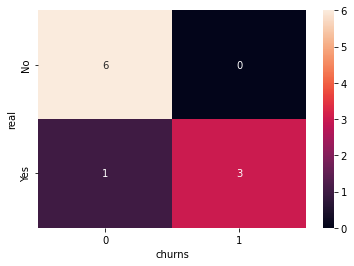

In [19]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#         Matriz de confusão
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

df =pd.DataFrame(df, columns=['real', 'churn'])
matrix_cnf =pd.crosstab(df['real'], df['churn'], rownames=['real'], colnames=['churns'])

sns.heatmap(matrix_cnf, annot=True).figure.savefig("matrix cnf.png")

In [20]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#        Arrumando Data
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

data =str(datetime.date.today())

dia =data[8:]
mes =data[5:7]
ano =data[:4]


relt ='Relatório Churn {}-{}-{}.docx'.format(dia, mes,ano)

In [21]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#             Relatório
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━


#━━━━━━━━❮Abrindo Arquivo❯━━━━━━━━━
arquivo =Document()
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━


#━━━━━━━━━━━━━❮Titulo❯━━━━━━━━━━━━━
arquivo.add_heading("Relatório de Churn                {}/{}/{}".format(dia, mes,ano), 0)
arquivo.add_paragraph('')
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

#━━━━━━━━━━━━━❮Briefing❯━━━━━━━━━━━━━

arquivo.add_paragraph('Este relatório foi feito de forma automática e visa auxiliar a tomada de decisão em relação a área de vendas e marketing da empresa.')
arquivo.add_paragraph('                                                                        Documento realizado pelo software Ragnar, de autoria')
arquivo.add_paragraph('')


arquivo.add_page_break()

#━━━━━━━━❮Análise Gráfica 01❯━━━━━━━━━
arquivo.add_paragraph('──────────────────────≪Análise Gráfica Inicial≫─────────────────────')
arquivo.add_paragraph('')

arquivo.add_paragraph('')
arquivo.add_paragraph('Segundo as nossas analises, o tempo de permanencia do clinete é crucial para a fidelização do cliene, pois quanto mais tempo ele fica na empresa, menor a chance de churn.')
arquivo.add_paragraph('*Gráfico citado abaixo*')


arquivo.add_picture("graph Churn-churn.png")
#━━━━━━━━━━━━━━━❮Análise Gráfica 02❯━━━━━━━━━━━━━━━━
arquivo.add_paragraph('')
arquivo.add_paragraph('É possível ver também que não faz muita diferença se o responsável pelo plano tem algum dependente.')
arquivo.add_paragraph('*Gráfico citado abaixo*')

arquivo.add_picture("graph churn-dep .png")

#━━━━━━━━━━━━━━━❮Análise Gráfica 03❯━━━━━━━━━━━━━━━━
arquivo.add_paragraph('')
arquivo.add_paragraph('---')
arquivo.add_paragraph('*Gráfico citado abaixo*')

arquivo.add_picture("graph churn-MC.png")


#━━━━━━━━━━━━━━━❮Análise Gráfica 04❯━━━━━━━━━━━━━━━━
arquivo.add_paragraph('')
arquivo.add_paragraph('Seus clientes tem maior chance de churn ao entrar em sua empresa, pois quanto mais tempo se passar, menor a chance dos mesmos cancelarem.')
arquivo.add_paragraph('*Gráfico citado abaixo*')

arquivo.add_picture("matrix cnf.png")







#━━━━━━━━❮Fechando Arquivo❯━━━━━━━━━
arquivo.save('{}'.format(relt))

#files.download('{}'.format(relt))
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━